<a href="https://colab.research.google.com/github/aioshi21chowdhury/BROWSING_HISTORY-CLASSIFIER/blob/main/Copy_of_browsing_history_classifier(use_the_k_mean).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#preprocessing


In [ ]:
#installing pacag eto get the browsing history
!pip install browser-history
!pip install pandas

In [ ]:
!pip install pandas openpyxl
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 22.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd

# Load the browser history CSV file
history_df = pd.read_csv('history.csv')

# Display the first few rows of the data
print(history_df.head())


   order     id       date      time  \
0      0  75995  2/21/2025  19:41:52   
1      1  75995  2/21/2025  19:41:49   
2      2  95391  2/21/2025  19:41:34   
3      3  49911  2/21/2025  19:41:22   
4      4  95390  2/21/2025  19:41:09   

                                      title  \
0     Chrome History Classification Project   
1     Chrome History Classification Project   
2            XGBoost Classification Example   
3                                   ChatGPT   
4  (119) implementation of xgboot - YouTube   

                                                 url  visitCount  typedCount  \
0  https://chatgpt.com/c/6713f321-1b44-8003-98ce-...          14           0   
1  https://chatgpt.com/c/6713f321-1b44-8003-98ce-...          14           0   
2  https://chatgpt.com/c/67b88995-8768-8003-bb0e-...           1           0   
3                    https://chatgpt.com/?model=auto          20           0   
4  https://www.youtube.com/results?search_query=i...           1           0

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already available
nltk.download('stopwords')

# Load browser history data
df = pd.read_csv('history.csv')

# Define stopwords and unwanted terms
stop_words = set(stopwords.words('english'))
remove_terms = {'google', 'youtube'}

# Function to clean text
def clean_text(text):
    if pd.isna(text):
        return ''  # Handle missing values

    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove emojis, symbols, and numbers
    text = ' '.join(word for word in text.split() if word not in remove_terms and word not in stop_words)  # Remove unwanted terms and stopwords
    return text.strip()

# Apply text cleaning
df['cleaned_title'] = df['title'].apply(clean_text)

# Remove rows where cleaned_title is empty after processing
df = df[df['cleaned_title'].str.strip() != ""]

# Save the full dataset (all original columns + cleaned_title) as CSV
df.to_csv('cleaned_browser_history.csv', index=False)

# Save only the 'cleaned_title' column as a TXT file (one title per line)
df['cleaned_title'].to_csv('cleaned_text.txt', index=False, header=False)

print("CSV and text files have been created successfully.")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


CSV and text files have been created successfully.


In [ ]:
h=pd.read_csv("cleaned_browser_history.csv")
print(h.head())

   order     id       date      time  \
0      0  75995  2/21/2025  19:41:52   
1      1  75995  2/21/2025  19:41:49   
2      2  95391  2/21/2025  19:41:34   
3      3  49911  2/21/2025  19:41:22   
4      4  95390  2/21/2025  19:41:09   

                                      title  \
0     Chrome History Classification Project   
1     Chrome History Classification Project   
2            XGBoost Classification Example   
3                                   ChatGPT   
4  (119) implementation of xgboot - YouTube   

                                                 url  visitCount  typedCount  \
0  https://chatgpt.com/c/6713f321-1b44-8003-98ce-...          14           0   
1  https://chatgpt.com/c/6713f321-1b44-8003-98ce-...          14           0   
2  https://chatgpt.com/c/67b88995-8768-8003-bb0e-...           1           0   
3                    https://chatgpt.com/?model=auto          20           0   
4  https://www.youtube.com/results?search_query=i...           1           0

#matching the syllabus with cleaned_text


In [ ]:
# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('punkt_tab') # Download the 'punkt_tab' resource

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Ensure necessary downloads
nltk.download('punkt')
nltk.download('stopwords')

# Load syllabus text from file
syllabus_path = "Syllabus.txt"  # Replace with your actual file path

with open(syllabus_path, "r", encoding="utf-8") as file:
    syllabus_text = file.read().lower()  # Convert to lowercase

# Tokenization: Split text into words
words = word_tokenize(syllabus_text)

# Remove punctuation and stopwords
filtered_words = [
    word for word in words if word.isalpha() and word not in stopwords.words("english")
]

# Remove duplicates
unique_keywords = list(set(filtered_words))

print("Extracted Keywords:", unique_keywords)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Extracted Keywords: ['compute', 'yoshua', 'disk', 'aho', 'databases', 'examples', 'nature', 'references', 'determine', 'edge', 'loops', 'familiarity', 'wait', 'vectorizing', 'fita', 'dag', 'keys', 'translators', 'architectures', 'lectures', 'lock', 'coma', 'concept', 'ramakrishnan', 'chollet', 'basics', 'bounded', 'belief', 'cse', 'issues', 'returning', 'comparisons', 'hierarchical', 'composition', 'blind', 'production', 'methods', 'following', 'normal', 'operation', 'cannibals', 'specification', 'stack', 'try', 'mobilenet', 'discourse', 'complex', 'serial', 'era', 'features', 'textbooks', 'valueof', 'extension', 'pipelining', 'unit', 'weight', 'semester', 'set', 'web', 'yacc', 'hwang', 'yolo', 'np', 'classifications', 'based', 'pruning', 'strong', 'top', 'model', 'stein', 'raj', 'design', 'table', 'components', 'convolutional', 'derivatives', 'couch', 'inner', 'comprehend', 'describe', 'tree', 'vectorization', 'dcl', 'bayesian', 'parser', 'structures', 'book', 'formal', 'predicate', '

In [ ]:
# Convert extracted keywords to a set for faster lookup
study_keywords = set(unique_keywords)  # 'unique_keywords' from the syllabus processing


In [ ]:
# Function to check if a title contains study-related words
def is_study_related(title):
    words = set(title.split())  # Convert title into a set of words
    return bool(words & study_keywords)  # Check for intersection with study keywords
#here in the func. the words are the cleaned_title word which are compaired with the syllabus words (study_keywords) using boolean "&"
# Apply classification
df["is_study"] = df["cleaned_title"].apply(is_study_related)



In [ ]:
# Count study and non-study searches
total_searches = len(df)
study_count = df["is_study"].sum()
non_study_count = total_searches - study_count

# Calculate percentages
study_percentage = (study_count / total_searches) * 100
non_study_percentage = 100 - study_percentage

# Print results
print(f"Study Searches: {study_percentage:.2f}%")
print(f"Non-Study Searches: {non_study_percentage:.2f}%")


Study Searches: 40.01%
Non-Study Searches: 59.99%


#use the clusters and match with the cleaned_title


In [ ]:
import os
import nltk
import gensim
import numpy as np
from nltk.tokenize import sent_tokenize
from gensim.utils import simple_preprocess
from gensim.models import Word2Vec
from sklearn.cluster import KMeans

# Download necessary NLTK resources
nltk.download('punkt')

# Path where cleaned text files are stored
path = "cleaned_text.txt"

# Read and preprocess the text data
story = []
with open(path, encoding='utf-8') as f:  # Use UTF-8 for better compatibility
    corpus = f.read()
    raw_sentences = sent_tokenize(corpus)  # Sentence tokenization
    for sent in raw_sentences:
        story.append(simple_preprocess(sent))  # Tokenize words and remove unwanted characters

# Train Word2Vec model with window size ≤ 3
model = Word2Vec(sentences=story, window=8, min_count=2, workers=4)

# Train the model
model.train(story, total_examples=model.corpus_count, epochs=model.epochs)

# Get word vectors
word_vectors = model.wv

# Convert word vectors to NumPy array for clustering (ensure float64)
word_list = list(word_vectors.key_to_index.keys())
vector_list = np.array([word_vectors[word] for word in word_list], dtype=np.float64)

# Apply K-Means clustering to group similar words
num_clusters = 5  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
kmeans.fit(vector_list)

# Assign words to clusters
word_clusters = {i: [] for i in range(num_clusters)}
for word, cluster in zip(word_list, kmeans.labels_):
    word_clusters[cluster].append(word)

# Display words in each cluster
for cluster_id, words in word_clusters.items():
    print(f"Cluster {cluster_id}: {words}")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Cluster 0: ['skillsbuild', 'open', 'projects', 'ibm', 'datasets', 'practice', 'portal', 'resnetpripynb', 'geeks', 'detection', 'barrackpore', 'drawing', 'system', 'news', 'tax', 'dbms', 'design', 'compiler', 'aioshi', 'chowdhury', 'longest', 'income', 'national', 'matrix', 'engineering', 'winter', 'module', 'government', 'temple', 'road', 'university', 'certification', 'merge', 'ieee', 'near', 'accident', 'test', 'analytics', 'ii', 'rotate', 'grow', 'conference', 'college', 'largest', 'jam', 'password', 'continuous', 'alipore', 'restaurant', 'maharaj', 'nextstep', 'prefix', 'database', 'kalyani', 'progress', 'pp', 'zoological', 'nptel', 'eating', 'rookie', 'krishna', 'poorva', 'javatpoint', 'rectangle', 'histogram', 'turning', 'programming', 'film', 'results', 'analyst', 'input', 'csrbox', 'challenge', 'message', 'sheets', 'alert', 'hotel', 'decisions', 'cute', 'oracle', 'international', 'subsets', 'white', 'rooms', 'multithreading', 'realtime', 'subarray', 'management', 'hd', 'even', 

In [ ]:
# Identify study clusters
study_clusters = set()
for cluster_id, words in word_clusters.items():
    if any(word in study_keywords for word in words):
        study_clusters.add(cluster_id)

print("Study Clusters:", study_clusters)

Study Clusters: {0, 1, 2, 3, 4}


In [ ]:
import numpy as np

# Function to classify titles based on clusters
def is_study_related_cluster(title):
    title_words = title.split()
    cluster_labels = []
    for word in title_words:
        if word in word_vectors:  # Check if the word is in the Word2Vec vocabulary
            # Convert the word vector to float64 and reshape it
            word_vector = np.array(word_vectors[word], dtype=np.float64).reshape(1, -1)
            cluster_label = kmeans.predict(word_vector)[0]  # Predict cluster for the word
            cluster_labels.append(cluster_label)
    # Check if majority of words belong to study clusters
    if len(cluster_labels) > 0:
        study_count = sum(1 for label in cluster_labels if label in study_clusters)
        return study_count / len(cluster_labels) > 0.5  # Threshold for classification
    return False

# Apply classification
df["is_study_cluster"] = df["cleaned_title"].apply(is_study_related_cluster)

# Compare results
print(df[["cleaned_title", "is_study", "is_study_cluster"]].head())

                           cleaned_title  is_study  is_study_cluster
0  chrome history classification project      True              True
1  chrome history classification project      True              True
2         xgboost classification example      True              True
3                                chatgpt     False              True
4                  implementation xgboot      True              True


In [ ]:
# Count study and non-study searches
total_searches = len(df)
study_count = df["is_study_cluster"].sum()
non_study_count = total_searches - study_count

# Calculate percentages
study_percentage = (study_count / total_searches) * 100
non_study_percentage = 100 - study_percentage

# Print results
print(f"Study Searches: {study_percentage:.2f}%")
print(f"Non-Study Searches: {non_study_percentage:.2f}%")

Study Searches: 99.11%
Non-Study Searches: 0.89%


In [ ]:
df.to_csv("classified_browser_history_with_clusters.csv", index=False)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


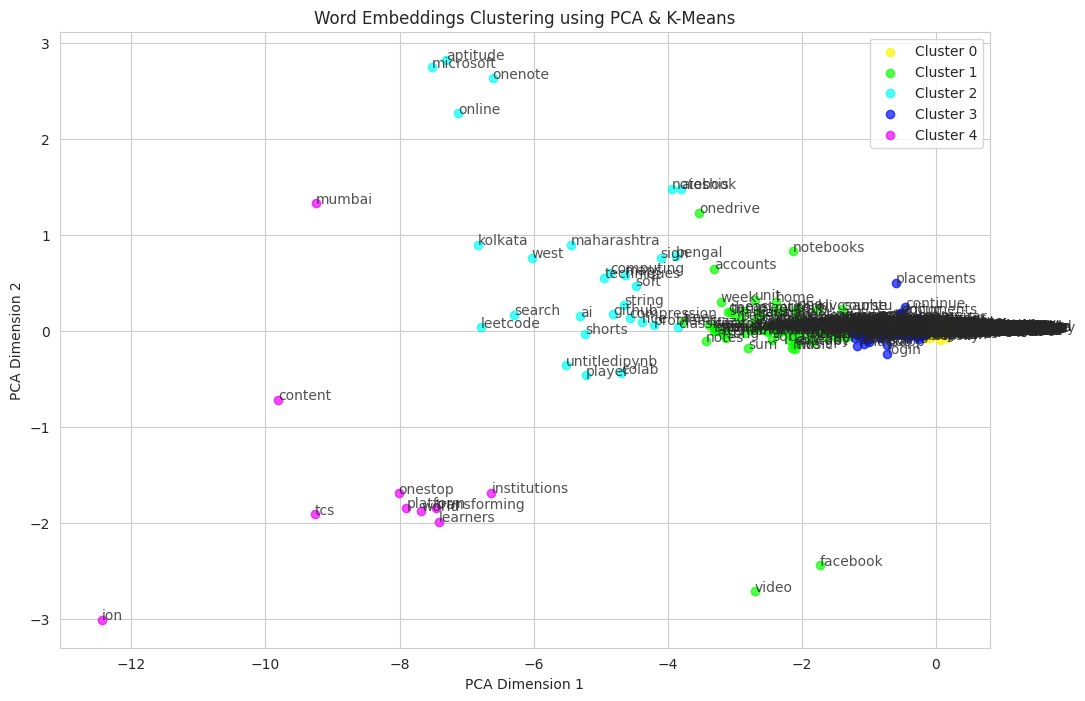

In [ ]:
import os
import nltk
import gensim
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import sent_tokenize
from gensim.utils import simple_preprocess
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Download necessary NLTK resources
nltk.download('punkt')

# Path where cleaned text files are stored
path = "cleaned_text.txt"

# Read and preprocess the text data
story = []
with open(path, encoding='utf-8') as f:  # Use UTF-8 for better compatibility
    corpus = f.read()
    raw_sentences = sent_tokenize(corpus)  # Sentence tokenization
    for sent in raw_sentences:
        story.append(simple_preprocess(sent))  # Tokenize words and remove unwanted characters

# Train Word2Vec model with window size ≤ 3
model = Word2Vec(sentences=story, window=3, min_count=2, workers=4)

# Train the model
model.train(story, total_examples=model.corpus_count, epochs=model.epochs)

# Get word vectors
word_vectors = model.wv

# Convert word vectors to NumPy array for clustering
word_list = list(word_vectors.key_to_index.keys())
vector_list = np.array([word_vectors[word] for word in word_list])

# Apply K-Means clustering
num_clusters = 5  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
kmeans.fit(vector_list)

# Assign words to clusters
word_clusters = {i: [] for i in range(num_clusters)}
for word, cluster in zip(word_list, kmeans.labels_):
    word_clusters[cluster].append(word)

# Reduce dimensionality using PCA or t-SNE
pca = PCA(n_components=2)  # Reduce to 2D
reduced_vectors = pca.fit_transform(vector_list)

# Alternatively, use t-SNE for better separation (optional)
# tsne = TSNE(n_components=2, perplexity=30, random_state=42)
# reduced_vectors = tsne.fit_transform(vector_list)

# Create a scatter plot of word embeddings
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Plot words with cluster colors
colors = sns.color_palette("hsv", num_clusters)
for i in range(num_clusters):
    cluster_points = reduced_vectors[kmeans.labels_ == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=[colors[i]], label=f"Cluster {i}", alpha=0.7)

# Annotate words
for i, word in enumerate(word_list):
    plt.annotate(word, (reduced_vectors[i, 0], reduced_vectors[i, 1]), fontsize=10, alpha=0.8)

plt.title("Word Embeddings Clustering using PCA & K-Means")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.legend()
plt.show()


In [ ]:
import os
import nltk
import gensim
import numpy as np
import plotly.express as px
from nltk.tokenize import sent_tokenize
from gensim.utils import simple_preprocess
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Download necessary resources
nltk.download('punkt')

# Load the cleaned text file
path = "cleaned_text.txt"
story = []

with open(path, encoding='utf-8') as f:
    corpus = f.read()
    raw_sentences = sent_tokenize(corpus)
    for sent in raw_sentences:
        story.append(simple_preprocess(sent))

# Train Word2Vec model
model = Word2Vec(sentences=story, window=3, min_count=2, workers=4)
model.train(story, total_examples=model.corpus_count, epochs=model.epochs)

# Extract word vectors
word_vectors = model.wv
words = word_vectors.index_to_key[:100]  # Get first 100 words
vector_list = np.array([word_vectors[word] for word in words])

# Apply K-Means clustering
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(vector_list)

# Reduce dimensionality to 3D using PCA
pca = PCA(n_components=3)
X_transformed = pca.fit_transform(vector_list)

# Create interactive 3D scatter plot
fig = px.scatter_3d(
    x=X_transformed[:, 0],
    y=X_transformed[:, 1],
    z=X_transformed[:, 2],
    color=clusters,  # Color by cluster
    text=words,  # Annotate words
    labels={'color': 'Cluster'}
)

# Update layout
fig.update_traces(marker=dict(size=6), textposition='top center')
fig.update_layout(title="3D Word Embeddings with K-Means Clustering")

# Show the interactive plot
fig.show()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# import nltk
# import string
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize

# # Ensure necessary downloads
# nltk.download('punkt')
# nltk.download('stopwords')

# # Load syllabus text from file
# syllabus_path = "Syllabus.txt"  # Replace with your actual file path

# with open(syllabus_path, "r", encoding="utf-8") as file:
#     syllabus_text = file.read().lower()  # Convert to lowercase

# # Tokenization: Split text into words
# words = word_tokenize(syllabus_text)

# # Remove punctuation and stopwords
# filtered_words = [
#     word for word in words if word.isalpha() and word not in stopwords.words("english")
# ]

# # Remove duplicates
# unique_keywords = list(set(filtered_words))

# print("Extracted Keywords:", unique_keywords)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Extracted Keywords: ['neural', 'number', 'marketing', 'simplex', 'theory', 'member', 'satisfaction', 'acid', 'organisation', 'improve', 'total', 'sigma', 'posting', 'paths', 'core', 'kaizen', 'engineering', 'harold', 'static', 'ring', 'memory', 'concurrency', 'hierarchical', 'methods', 'house', 'inherited', 'finalize', 'tractable', 'solid', 'matplotlib', 'nets', 'applets', 'internals', 'lr', 'based', 'embedding', 'three', 'prentice', 'strided', 'cousins', 'non', 'pearson', 'identify', 'outcome', 'need', 'armstrong', 'role', 'made', 'primer', 'programming', 'lexical', 'patterson', 'p', 'views', 'private', 'hours', 'hopcroft', 'mark', 'conquer', 'dft', 'analyser', 'multiple', 'checker', 'phases', 'python', 'integer', 'build', 'elementary', 'classifications', 'building', 'performances', 'returning', 'kleinberg', 'program', 'relationships', 'fuzzy', 'graphplan', 'shortest', 'strassen', 'equation', 'graphical', 'modelling', 'long', 'applications', 'organising', 'schema', 'dml', 'application

In [ ]:
import pickle

# Assuming 'study_keywords' and the function 'is_study_related' are the core components
# of your classification logic

# # Save study_keywords
# with open('study_keywords.pkl', 'wb') as f:
#     pickle.dump(study_keywords, f)

# Save is_study_related function
with open('is_study_related_func.pkl', 'wb') as f:
    pickle.dump(is_study_related, f)

print("Model components saved successfully!")

Model components saved successfully!


In [ ]:
import pickle

# Assuming your model is stored in a variable called 'model'
with open('history_classifier_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [ ]:
# Load classification function
with open('is_study_related_func.pkl', 'rb') as f:
    is_study_related = pickle.load(f)

# Example usage
title = "leetcode"
print(is_study_related(title))  # Output: True

True


In [ ]:
# Ensure both columns exist in the DataFrame
if 'is_study' in df.columns and 'is_study_cluster' in df.columns:
    # Create a new column to indicate misclassification
    df['misclassified'] = df['is_study'] != df['is_study_cluster']

    # Count the number of misclassifications
    misclassification_count = df['misclassified'].sum()
    print(f"Number of misclassifications: {misclassification_count}")

    # Display misclassified rows for analysis
    misclassified_rows = df[df['misclassified']]
    print("\nMisclassified Rows:")
    print(misclassified_rows[['cleaned_title', 'is_study', 'is_study_cluster']])
else:
    print("Error: 'is_study' or 'is_study_cluster' column is missing in the DataFrame.")

Number of misclassifications: 15480

Misclassified Rows:
                   cleaned_title  is_study  is_study_cluster
3                        chatgpt     False              True
5      xgboost explained minutes     False              True
6                        xgboost     False              True
8                        chatgpt     False              True
10          hackathonipynb colab     False              True
...                          ...       ...               ...
26178                      video     False              True
26179                   facebook     False              True
26180                      video     False              True
26181                   facebook     False              True
26182                   facebook     False              True

[15480 rows x 3 columns]


In [ ]:
# Ensure both columns exist in the DataFrame
if 'is_study' in df.columns and 'is_study_hybrid' in df.columns:
    # Calculate the number of correct predictions
    correct_predictions = (df['is_study'] == df['is_study_hybrid']).sum()

    # Calculate the total number of predictions
    total_predictions = len(df)

    # Calculate accuracy
    accuracy = (correct_predictions / total_predictions) * 100
    print(f"Accuracy of the hybrid model: {accuracy:.2f}%")
else:
    print("Error: 'is_study' or 'is_study_hybrid' column is missing in the DataFrame.")

Accuracy of the hybrid model: 40.89%


In [ ]:
import pickle
from gensim.models import Word2Vec
from sklearn.cluster import KMeans

# Save Word2Vec model
model.save('word2vec.model')

# Save K-Means model
with open('kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

# Save study_clusters
with open('study_clusters.pkl', 'wb') as f:
    pickle.dump(study_clusters, f)

# Save the function
with open('is_study_related_cluster.pkl', 'wb') as f:
    pickle.dump(is_study_related_cluster, f)

print("Function and dependencies saved successfully!")

Function and dependencies saved successfully!
